In [ ]:
!python --version

Python 3.10.12


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
from google.colab import drive
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.models as models
from tqdm.notebook import tqdm #for showing bars

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#to check number of images in testing and training set
# Replace 'path/to/testing_folder' and 'path/to/training_folder' with the actual paths to your testing and training folders
testing_folder_path = '/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/testing'
training_folder_path = '/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/training'
validation_folder_path = '/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/validation'

def get_num_files_in_folder(folder_path):
    num_files = 0
    for dirpath, _, filenames in os.walk(folder_path):
        num_files += len(filenames)
    return num_files

# Get the number of files in the testing folder
testing_length = get_num_files_in_folder(testing_folder_path)
print(f"Number of files in testing folder: {testing_length}")

# Get the number of files in the training folder
training_length = get_num_files_in_folder(training_folder_path)
print(f"Number of files in training folder: {training_length}")

# Get the number of files in the validation folder
validation_length = get_num_files_in_folder(validation_folder_path)
print(f"Number of files in validation folder: {validation_length}")

Number of files in testing folder: 95
Number of files in training folder: 2000
Number of files in validation folder: 192


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to (224, 224) for MobileNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet normalization
])

In [ ]:
training='/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/training'
testing='/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/testing'
validation= '/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/validation'

In [ ]:
test_dataset = ImageFolder(root=testing, transform=transform)

In [ ]:
train_dataset = ImageFolder(root=training, transform=transform)

In [ ]:
valid_dataset = ImageFolder(root=validation, transform=transform)

In [ ]:
class_counts = {}
for class_name, class_idx in train_dataset.class_to_idx.items():
    class_folder_path = os.path.join(training, class_name)
    class_count = len(os.listdir(class_folder_path))
    class_counts[class_name] = class_count

# Print the number of images in each class folder
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")

Class 'glioma_tumor_Back_Angle': 500 images
Class 'meningioma_tumor_Back_Angle': 500 images
Class 'no_tumor_Back_Angle': 500 images
Class 'pituitary_tumor_Back_Angle': 500 images


In [ ]:
class_counts = {}
for class_name, class_idx in test_dataset.class_to_idx.items():
    class_folder_path = os.path.join(testing, class_name)
    class_count = len(os.listdir(class_folder_path))
    class_counts[class_name] = class_count

# Print the number of images in each class folder
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")

Class 'glioma_tumor_Back_Angle': 30 images
Class 'meningioma_tumor_Back_Angle': 28 images
Class 'no_tumor_Back_Angle': 4 images
Class 'pituitary_tumor_Back_Angle': 33 images


In [ ]:
class_counts = {}
for class_name, class_idx in valid_dataset.class_to_idx.items():
    class_folder_path = os.path.join(validation, class_name)
    class_count = len(os.listdir(class_folder_path))
    class_counts[class_name] = class_count

# Print the number of images in each class folder
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")

Class 'glioma_tumor_Back_Angle': 61 images
Class 'meningioma_tumor_Back_Angle': 58 images
Class 'no_tumor_Back_Angle': 9 images
Class 'pituitary_tumor_Back_Angle': 64 images


In [ ]:
glimoa_train = os.listdir("/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/back_angle_dataset/training/glioma_tumor_Back_Angle")
men_train =  os.listdir("/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/back_angle_dataset/training/meningioma_tumor_Back_Angle")
notumor_train = os.listdir("/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/back_angle_dataset/training/no_tumor_Back_Angle")
pit_train =  os.listdir("/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/back_angle_dataset/training/pituitary_tumor_Back_Angle")

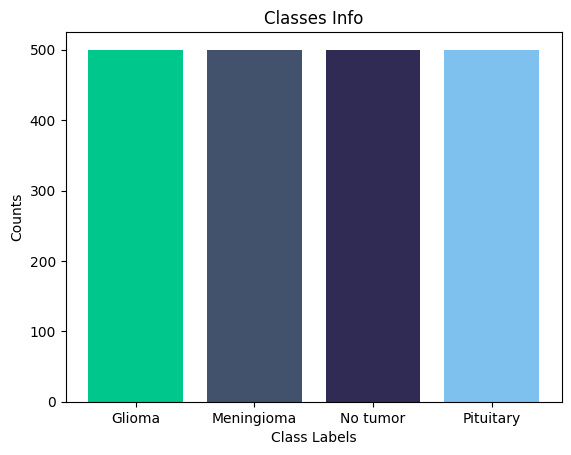

In [ ]:
import matplotlib.pyplot as plt

labels = ["Glioma", "Meningioma", "No tumor", "Pituitary"]
values = [len(glimoa_train), len(men_train), len(notumor_train), len(pit_train)]

# Set the color palette for the bars
colors = ["#00C78C", "#42526C", "#302B54", "#7EC0EE"]

# Create the bar plot
plt.bar(labels, values, color=colors)

# Set the title and labels
plt.title('Classes Info')
plt.xlabel('Class Labels')
plt.ylabel('Counts')

# Show the plot
plt.show()

In [ ]:
glimoa_valid = os.listdir("/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/back_angle_dataset/validation/glioma_tumor_Back_Angle")
men_valid =  os.listdir("/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/back_angle_dataset/validation/meningioma_tumor_Back_Angle")
notumor_valid = os.listdir("/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/back_angle_dataset/validation/no_tumor_Back_Angle")
pit_valid =  os.listdir("/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/back_angle_dataset/validation/pituitary_tumor_Back_Angle")

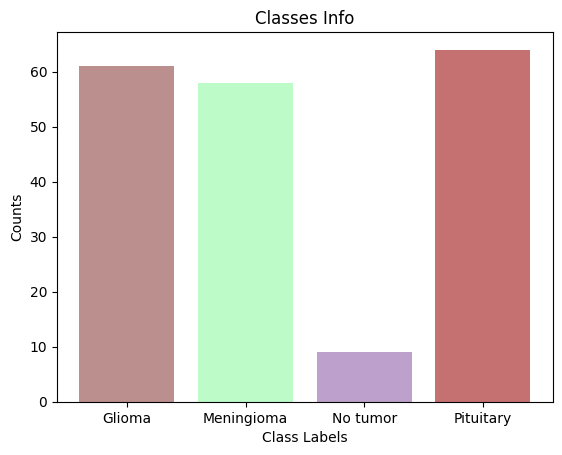

In [ ]:
labels = ["Glioma", "Meningioma", "No tumor", "Pituitary"]
values = [len(glimoa_valid), len(men_valid), len(notumor_valid), len(pit_valid)]

# Set the color palette for the bars
colors = ["#BC8F8F", "#BDFCC9", "#BDA0CB", "#C67171"]

# Create the bar plot
plt.bar(labels, values, color=colors)

# Set the title and labels
plt.title('Classes Info')
plt.xlabel('Class Labels')
plt.ylabel('Counts')

# Show the plot
plt.show()

In [ ]:
glimoa_test = os.listdir("/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/back_angle_dataset/testing/glioma_tumor_Back_Angle")
men_test =  os.listdir("/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/back_angle_dataset/testing/meningioma_tumor_Back_Angle")
notumor_test = os.listdir("/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/back_angle_dataset/testing/no_tumor_Back_Angle")
pit_test =  os.listdir("/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/back_angle_dataset/testing/pituitary_tumor_Back_Angle")

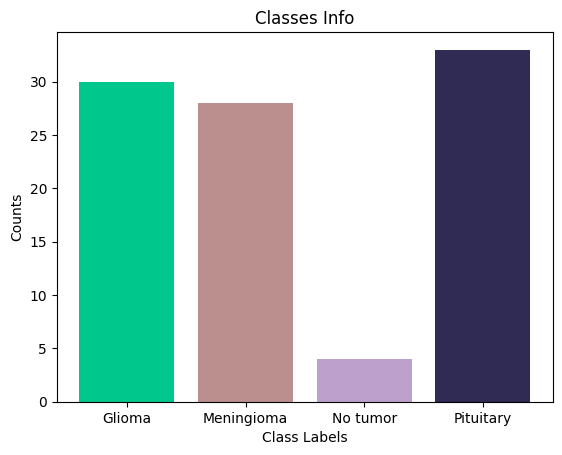

In [ ]:
labels = ["Glioma", "Meningioma", "No tumor", "Pituitary"]
values = [len(glimoa_test), len(men_test), len(notumor_test), len(pit_test)]

# Set the color palette for the bars
colors = ["#00C78C", "#BC8F8F", "#BDA0CB", "#302B54"]

# Create the bar plot
plt.bar(labels, values, color=colors)

# Set the title and labels
plt.title('Classes Info')
plt.xlabel('Class Labels')
plt.ylabel('Counts')

# Show the plot
plt.show()

In [ ]:
batch_size=32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
a = next(iter(train_loader))
a[0].size()

torch.Size([32, 3, 224, 224])

In [ ]:
a = next(iter(test_loader))
a[0].size()

torch.Size([32, 3, 224, 224])

In [ ]:
a = next(iter(valid_loader))
a[0].size()

torch.Size([32, 3, 224, 224])

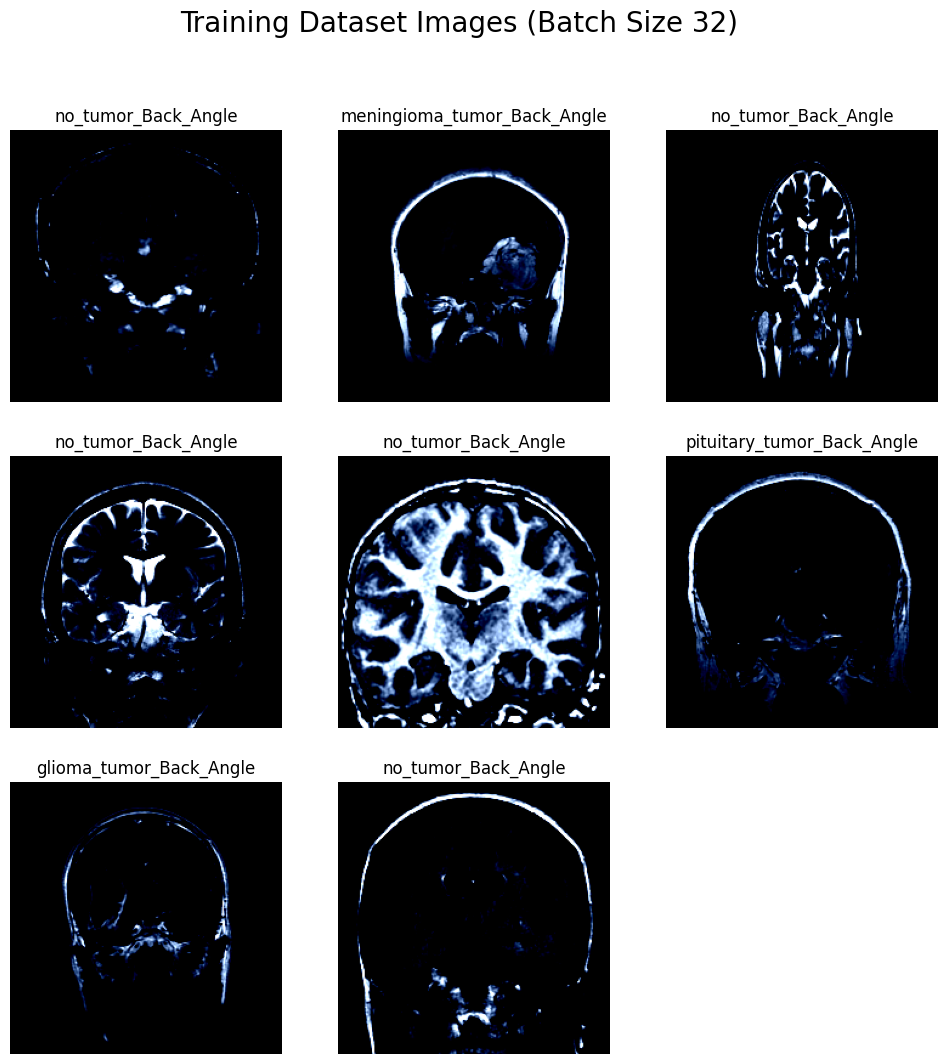

In [ ]:
import numpy as np
images, labels = next(iter(train_loader))

# Function to display a grid of images along with class names
def show_images_grid(images, labels, class_names, title):
    num_images = images.shape[0]
    num_rows = int(np.ceil(np.sqrt(num_images)))
    num_cols = int(np.ceil(num_images / num_rows))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
    fig.suptitle(title, fontsize=20)

    for i, ax in enumerate(axes.ravel()):
        if i < num_images:
            image = images[i].permute(1, 2, 0)  # Change tensor shape (C, H, W) to (H, W, C)
            ax.imshow(image)
            ax.set_title(class_names[labels[i].item()])
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()

# List of class names in the dataset
class_names = train_dataset.classes

# Display the first 8 images from the batch with class names
show_images_grid(images[:8], labels[:8], class_names, "Training Dataset Images (Batch Size 32)")

In [ ]:
# Calculate the total number of batches for training dataset
total_train_batches = len(train_dataset) // batch_size
if len(train_dataset) % batch_size != 0:
    total_train_batches += 1

# Calculate the total number of batches for testing dataset
total_test_batches = len(test_dataset) // batch_size
if len(test_dataset) % batch_size != 0:
    total_test_batches += 1
# Calculate the total number of batches for validation dataset
total_valid_batches = len(valid_dataset) // batch_size
if len(valid_dataset) % batch_size != 0:
    total_valid_batches += 1


print(f"Total number of batches for training dataset: {total_train_batches}")
print(f"Total number of batches for testing dataset: {total_test_batches}")
print(f"Total number of batches for validation dataset: {total_valid_batches}")

Total number of batches for training dataset: 63
Total number of batches for testing dataset: 3
Total number of batches for validation dataset: 6


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from torchvision.models import mobilenet_v2
num_classes = len(train_dataset.classes)
model = mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 228MB/s]


In [ ]:
print(model)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train(model, dataloader, criterion, optimizer):
    model.train()
    train_loss = 0.0
    corrects = 0

    for inputs, labels in tqdm(dataloader, total=len(dataloader), leave=True):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        corrects += torch.sum(preds == labels.data)

    train_loss = train_loss / len(dataloader.dataset)
    train_acc = corrects.double() / len(dataloader.dataset)

    return train_loss, train_acc

# Validation loop
def validate(model, dataloader, criterion):
    model.eval()
    valid_loss = 0.0
    corrects = 0

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, total=len(dataloader), leave=True):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            valid_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            corrects += torch.sum(preds == labels.data)

    valid_loss = valid_loss / len(dataloader.dataset)
    valid_acc = corrects.double() / len(dataloader.dataset)

    return valid_loss, valid_acc

# Training and validation loop
num_epochs = 30
best_valid_loss = float('inf')
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    train_loss, train_acc = train(model, train_loader, criterion, optimizer)
    valid_loss, valid_acc = validate(model, valid_loader, criterion)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"Valid Loss: {valid_loss:.4f} | Valid Acc: {valid_acc:.4f}")



Epoch 1/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.2994 | Train Acc: 0.8955
Valid Loss: 0.5163 | Valid Acc: 0.8333
Epoch 2/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0847 | Train Acc: 0.9705
Valid Loss: 0.3673 | Valid Acc: 0.9010
Epoch 3/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0842 | Train Acc: 0.9720
Valid Loss: 0.4865 | Valid Acc: 0.8646
Epoch 4/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0653 | Train Acc: 0.9790
Valid Loss: 0.4344 | Valid Acc: 0.9271
Epoch 5/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0427 | Train Acc: 0.9860
Valid Loss: 0.5551 | Valid Acc: 0.8646
Epoch 6/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0479 | Train Acc: 0.9845
Valid Loss: 0.4248 | Valid Acc: 0.8802
Epoch 7/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0249 | Train Acc: 0.9935
Valid Loss: 0.5323 | Valid Acc: 0.9010
Epoch 8/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0029 | Train Acc: 1.0000
Valid Loss: 0.5033 | Valid Acc: 0.9375
Epoch 9/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0011 | Train Acc: 1.0000
Valid Loss: 0.4149 | Valid Acc: 0.9375
Epoch 10/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0003 | Train Acc: 1.0000
Valid Loss: 0.4209 | Valid Acc: 0.9115
Epoch 11/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0003 | Train Acc: 1.0000
Valid Loss: 0.4734 | Valid Acc: 0.9167
Epoch 12/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0005 | Train Acc: 1.0000
Valid Loss: 0.4807 | Valid Acc: 0.9062
Epoch 13/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0156 | Train Acc: 0.9940
Valid Loss: 0.7143 | Valid Acc: 0.8802
Epoch 14/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.1002 | Train Acc: 0.9685
Valid Loss: 0.3551 | Valid Acc: 0.9010
Epoch 15/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0351 | Train Acc: 0.9890
Valid Loss: 0.4388 | Valid Acc: 0.9323
Epoch 16/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0204 | Train Acc: 0.9950
Valid Loss: 0.2614 | Valid Acc: 0.9427
Epoch 17/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0228 | Train Acc: 0.9935
Valid Loss: 0.3409 | Valid Acc: 0.9219
Epoch 18/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0404 | Train Acc: 0.9860
Valid Loss: 0.3096 | Valid Acc: 0.9219
Epoch 19/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0080 | Train Acc: 0.9975
Valid Loss: 0.2850 | Valid Acc: 0.9323
Epoch 20/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0066 | Train Acc: 0.9990
Valid Loss: 0.4859 | Valid Acc: 0.9115
Epoch 21/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0150 | Train Acc: 0.9970
Valid Loss: 0.5799 | Valid Acc: 0.9167
Epoch 22/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0325 | Train Acc: 0.9895
Valid Loss: 0.6303 | Valid Acc: 0.9115
Epoch 23/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.1202 | Train Acc: 0.9660
Valid Loss: 1.0697 | Valid Acc: 0.7552
Epoch 24/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0428 | Train Acc: 0.9890
Valid Loss: 0.2385 | Valid Acc: 0.9479
Epoch 25/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0049 | Train Acc: 0.9990
Valid Loss: 0.2294 | Valid Acc: 0.9375
Epoch 26/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0156 | Train Acc: 0.9945
Valid Loss: 0.3598 | Valid Acc: 0.9115
Epoch 27/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0145 | Train Acc: 0.9955
Valid Loss: 0.3856 | Valid Acc: 0.9323
Epoch 28/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0158 | Train Acc: 0.9940
Valid Loss: 0.5833 | Valid Acc: 0.8438
Epoch 29/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0390 | Train Acc: 0.9925
Valid Loss: 0.2809 | Valid Acc: 0.9375
Epoch 30/30


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 0.0031 | Train Acc: 1.0000
Valid Loss: 0.2240 | Valid Acc: 0.9427


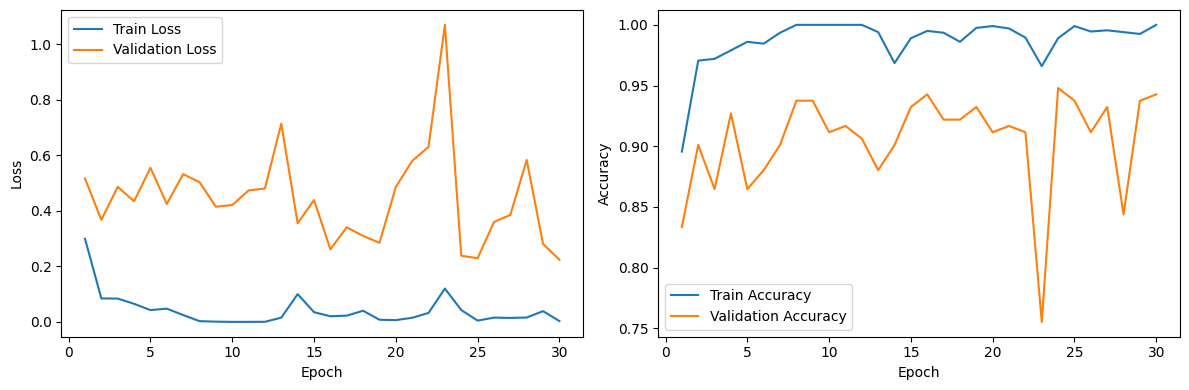

In [ ]:
train_accuracies_cpu = [acc.cpu().numpy() for acc in train_accuracies]
valid_accuracies_cpu = [acc.cpu().numpy() for acc in valid_accuracies]
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies_cpu, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), valid_accuracies_cpu, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
torch.save(model, '/content/drive/MyDrive/back_angle_30.pt')

In [ ]:
model = torch.load('/content/drive/MyDrive/back_angle_30.pt')

In [ ]:
test_losses = []
test_accuracies = []

# Evaluate the model on testing data with tqdm progress bar
Model.eval()
correct_test = 0
total_test = 0
running_loss = 0.0
test_preds = []
test_labels = []
with torch.no_grad(), tqdm(test_loader, desc="Testing Batches", leave=False) as t:
    for inputs, labels in t:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        _, predicted_test = torch.max(outputs.data, 1)
        test_preds.extend(predicted_test.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

        t.set_postfix({'Loss': running_loss / (t.n + 1)})

    test_accuracy = 100 * correct_test / total_test
    test_accuracies.append(test_accuracy)
    test_losses.append(running_loss / len(test_loader))

# Print the accuracy and loss for testing
print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Test Loss: {test_losses[-1]:.4f}")

Testing Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Test Accuracy: 94.74%
Test Loss: 0.2796


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(test_labels, test_preds, target_names=test_dataset.classes))

Classification Report:

                             precision    recall  f1-score   support

    glioma_tumor_Back_Angle       1.00      0.97      0.98        30
meningioma_tumor_Back_Angle       0.87      0.96      0.92        28
        no_tumor_Back_Angle       1.00      0.50      0.67         4
 pituitary_tumor_Back_Angle       0.97      0.97      0.97        33

                   accuracy                           0.95        95
                  macro avg       0.96      0.85      0.88        95
               weighted avg       0.95      0.95      0.95        95



Confusion Matrix:

[[29  1  0  0]
 [ 0 27  0  1]
 [ 0  2  2  0]
 [ 0  1  0 32]]


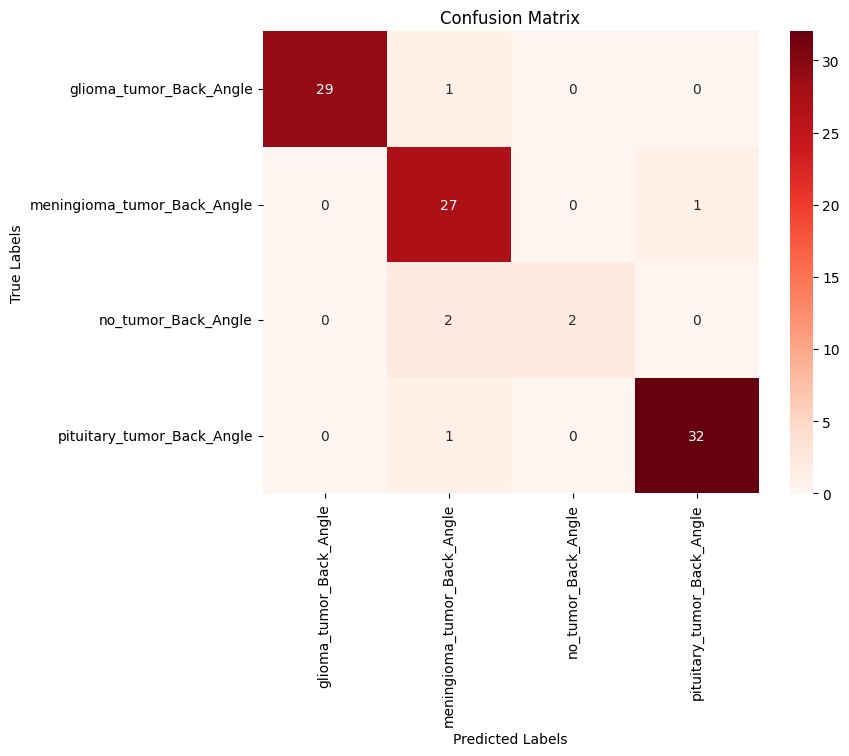

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ... (rest of the code for evaluation and generating test_preds and test_labels)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)

# Print the confusion matrix
print("Confusion Matrix:\n")
print(conf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!pip install torchvision matplotlib
!pip install torchcam
!pip install -e git+https://github.com/frgfm/torch-cam.git#egg=torchcam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 83.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.13.1 which

In [ ]:
%matplotlib inline
# All imports
import matplotlib.pyplot as plt
import torch
from torch.nn.functional import softmax, interpolate
from torchvision.io.image import read_image
from torchvision.models import resnet18
from torchvision.transforms.functional import normalize, resize, to_pil_image

from torchcam.methods import SmoothGradCAMpp, LayerCAM
from torchcam.utils import overlay_mask

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [ ]:
from PIL import Image

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

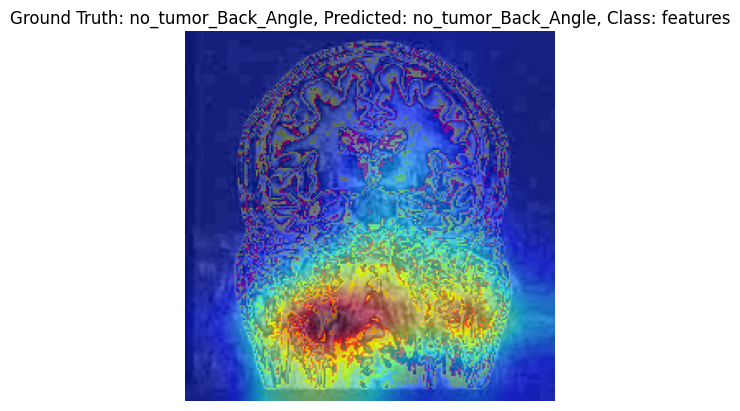

In [ ]:
# Instantiate your model here
model = torch.load('/content/drive/MyDrive/back_angle_30.pt')
model.eval()
cam_extractor = SmoothGradCAMpp(model)

# Image path of the single image you want to use
image_path = "/content/drive/MyDrive/brain_tumor_classification2/back_angle_dataset/testing/no_tumor_Back_Angle/image(307).jpg"

# Define class labels
class_labels = ['glioma_tumor_Back_Angle', 'meningioma_tumor_Back_Angle', 'no_tumor_Back_Angle', 'pituitary_tumor_Back_Angle']

# Define the transformation pipeline
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to desired size
    transforms.ToTensor(),           # Convert to tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # Normalize using ImageNet mean and std
        std=[0.229, 0.224, 0.225]
    ),
])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Read and preprocess the single image
img = Image.open(image_path)
input_tensor = preprocess(img)
input_tensor = input_tensor.to(device)

# Preprocess your data and feed it to the model

out = model(input_tensor.unsqueeze(0))

# Retrieve the CAM by passing the class index and the model output
predicted_class = out.squeeze(0).argmax().item()
cams = cam_extractor(predicted_class, out)

# Get predicted class label
predicted_label = torch.argmax(out).item()
predicted_class_name = class_labels[predicted_label]

# Get ground truth class name based on the image path
ground_truth_class_name = image_path.split('/')[-2]

# Display the Grad-CAM overlayed on the image along with class names
for name, cam in zip(cam_extractor.target_names, cams):
    result = overlay_mask(to_pil_image(input_tensor.cpu()), to_pil_image(cam.squeeze(0), mode='F'), alpha=0.5)
    plt.imshow(result)
    plt.axis('off')
    plt.title(f"Ground Truth: {ground_truth_class_name}, Predicted: {predicted_class_name}, Class: {name}")
    plt.show()